In [2]:
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
cmap = plt.cm.tab20

In [4]:
NO_OF_NODES = 10

In [5]:
beno = np.load('beno.npy')
deno = np.load('DENO.npy')
ceno = np.load('CENO.npy')
seno = np.load('SENO.npy')

In [6]:
states_list = beno[:,0]
actions = np.array(beno[:,1])
rewards = np.array(beno[:,2])

states = np.array([np.array(x) for x in states_list])

batt = states[:,0]
enp = states[:,1]
henergy = states[:,2]
fcast = states[:,3]

beno = np.column_stack((batt,enp,henergy,fcast,actions,rewards))

In [22]:
batt = beno[:,0]
beno_total_downtime = (batt < 0.0055).astype(int)
beno_total_overflow = (batt == 1).astype(int)


In [23]:
batt = deno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
deno_total_downtime = downtime_occur.sum(axis=0)
deno_total_overflow = overflow_occur.sum(axis=0)


In [24]:
batt = ceno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
ceno_total_downtime = downtime_occur.sum(axis=0)
ceno_total_overflow = overflow_occur.sum(axis=0)


In [25]:
batt = seno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
seno_total_downtime = downtime_occur.sum(axis=0)
seno_total_overflow = overflow_occur.sum(axis=0)


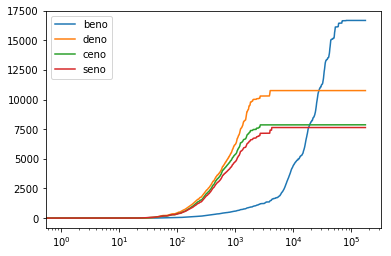

In [26]:
dummy = np.zeros_like(beno_total_downtime)
dummy[:deno_total_downtime.shape[0]] = deno_total_downtime
deno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:ceno_total_downtime.shape[0]] = ceno_total_downtime
ceno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:seno_total_downtime.shape[0]] = seno_total_downtime
seno_total_downtime = dummy


plt.plot(beno_total_downtime.cumsum())
plt.plot(deno_total_downtime.cumsum())
plt.plot(ceno_total_downtime.cumsum())
plt.plot(seno_total_downtime.cumsum())

plt.xscale('log')
plt.legend(['beno','deno','ceno','seno'])


In [ ]:
dummy = np.zeros_like(beno_total_overflow)
dummy[:deno_total_overflow.shape[0]] = deno_total_overflow
deno_total_overflow = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:ceno_total_overflow.shape[0]] = ceno_total_overflow
ceno_total_overflow = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:seno_total_overflow.shape[0]] = seno_total_overflow
seno_total_overflow = dummy




plt.plot(beno_total_overflow.cumsum())
plt.plot(deno_total_overflow.cumsum())
plt.plot(ceno_total_overflow.cumsum())
plt.plot(seno_total_overflow.cumsum())

plt.xscale('log')
plt.legend(['beno','deno','ceno','seno'])